# **Springboard Decision Tree Specialty Coffee Case Study - Tier 3**




# The Scenario

Imagine you've just finished the Springboard Data Science Career Track course, and have been hired by a rising popular specialty coffee company - RR Diner Coffee - as a data scientist. Congratulations!

RR Diner Coffee sells two types of thing:
- specialty coffee beans, in bulk (by the kilogram only) 
- coffee equipment and merchandise (grinders, brewing equipment, mugs, books, t-shirts).

RR Diner Coffee has three stores, two in Europe and one in the USA. The flagshap store is in the USA, and everything is quality assessed there, before being shipped out. Customers further away from the USA flagship store have higher shipping charges. 

You've been taken on at RR Diner Coffee because the company are turning towards using data science and machine learning to systematically make decisions about which coffee farmers they should strike deals with. 

RR Diner Coffee typically buys coffee from farmers, processes it on site, brings it back to the USA, roasts it, packages it, markets it, and ships it (only in bulk, and after quality assurance) to customers internationally. These customers all own coffee shops in major cities like New York, Paris, London, Hong Kong, Tokyo, and Berlin. 

Now, RR Diner Coffee has a decision about whether to strike a deal with a legendary coffee farm (known as the **Hidden Farm**) in rural China: there are rumours their coffee tastes of lychee and dark chocolate, while also being as sweet as apple juice. 

It's a risky decision, as the deal will be expensive, and the coffee might not be bought by customers. The stakes are high: times are tough, stocks are low, farmers are reverting to old deals with the larger enterprises and the publicity of selling *Hidden Farm* coffee could save the RR Diner Coffee business. 

Your first job, then, is ***to build a decision tree to predict how many units of the Hidden Farm Chinese coffee will be purchased by RR Diner Coffee's most loyal customers.*** 

To this end, you and your team have conducted a survey of 710 of the most loyal RR Diner Coffee customers, collecting data on the customers':
- age
- gender 
- salary 
- whether they have bought at least one RR Diner Coffee product online
- their distance from the flagship store in the USA (standardized to a number between 0 and 11) 
- how much they spent on RR Diner Coffee products on the week of the survey 
- how much they spent on RR Diner Coffee products in the month preeding the survey
- the number of RR Diner coffee bean shipments each customer has ordered over the preceding year. 

You also asked each customer participating in the survey whether they would buy the Hidden Farm coffee, and some (but not all) of the customers gave responses to that question. 

You sit back and think: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. There's some doubt in your mind about whether 70% is a reasonable threshold, but it'll do for the moment. 

To solve the problem, then, you will build a decision tree to implement a classification solution. 


-------------------------------
As ever, this notebook is **tiered**, meaning you can elect that tier that is right for your confidence and skill level. There are 3 tiers, with tier 1 being the easiest and tier 3 being the hardest. This is ***tier 3***, so it will be challenging. 

**1. Sourcing and loading** 
- Import packages
- Load data
- Explore the data

 
**2. Cleaning, transforming and visualizing**
- Cleaning the data
- Train/test split
  
  
**3. Modelling** 
- Model 1: Entropy model - no max_depth
- Model 2: Gini impurity model - no max_depth
- Model 3: Entropy model - max depth 3
- Model 4: Gini impurity model - max depth 3


**4. Evaluating and concluding** 
- How many customers will buy Hidden Farm coffee?
- Decision

**5. Random Forest** 
- Import necessary modules
- Model
- Revise conclusion
    

# 0. Overview

This notebook uses decision trees to determine whether the factors of salary, gender, age, how much money the customer spent last week and during the preceding month on RR Diner Coffee products, how many kilogram coffee bags the customer bought over the last year, whether they have bought at least one RR Diner Coffee product online, and their distance from the flagship store in the USA, could predict whether customers would purchase the Hidden Farm coffee if a deal with its farmers were struck. 

# 1. Sourcing and loading
## 1a. Import Packages

In [48]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from io import StringIO  
from IPython.display import Image  
# import pydotplus

In [49]:
!pip install pydotplus


## 1b. Load data 

In [50]:
# Read in the data to a variable called coffeeData
# Define the file path
file_path = r"C:\Users\user\Desktop\GitHub Projects\Project Files\Projects\Decision Tree Project\data\RRDinerCoffeeData.csv"

# Load the CSV file
coffeeData = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(coffeeData.head())

   Age  Gender  num_coffeeBags_per_year  spent_week  spent_month  SlrAY  \
0   36  Female                        0          24           73  42789   
1   24    Male                        0          44          164  74035   
2   24    Male                        0          39          119  30563   
3   20    Male                        0          30          107  13166   
4   24  Female                        0          20           36  14244   

   Distance  Online  Decision  
0  0.003168       0       1.0  
1  0.520906       0       NaN  
2  0.916005       1       1.0  
3  0.932098       1       NaN  
4  0.965881       0       1.0  


## 1c. Explore the data

As we've seen, exploration entails doing things like checking out the **initial appearance** of the data with head(), the **dimensions** of our data with .shape, the **data types** of the variables with .info(), the **number of non-null values**, how much **memory** is being used to store the data, and finally the major summary statistcs capturing **central tendancy, dispersion and the null-excluding shape of the dataset's distribution**. 

How much of this can you do yourself by this point in the course? Have a real go. 

In [51]:
# Call head() on your data 
# I did above

In [52]:
# Call .shape on your data
coffeeData.shape

(702, 9)

In [53]:
# Call info() on your data
coffeeData.info

<bound method DataFrame.info of      Age  Gender  num_coffeeBags_per_year  spent_week  spent_month  SlrAY  \
0     36  Female                        0          24           73  42789   
1     24    Male                        0          44          164  74035   
2     24    Male                        0          39          119  30563   
3     20    Male                        0          30          107  13166   
4     24  Female                        0          20           36  14244   
..   ...     ...                      ...         ...          ...    ...   
697   45  Female                        5          61          201  80260   
698   54    Male                        5          44          116  44077   
699   63    Male                        5          33          117  43081   
700   20  Female                        5          41          159  12522   
701   90    Male                        5          39          170  15098   

      Distance  Online  Decision  
0     0.

In [54]:
# Call describe() on your data to get the relevant summary statistics for your data 
coffeeData.describe

<bound method NDFrame.describe of      Age  Gender  num_coffeeBags_per_year  spent_week  spent_month  SlrAY  \
0     36  Female                        0          24           73  42789   
1     24    Male                        0          44          164  74035   
2     24    Male                        0          39          119  30563   
3     20    Male                        0          30          107  13166   
4     24  Female                        0          20           36  14244   
..   ...     ...                      ...         ...          ...    ...   
697   45  Female                        5          61          201  80260   
698   54    Male                        5          44          116  44077   
699   63    Male                        5          33          117  43081   
700   20  Female                        5          41          159  12522   
701   90    Male                        5          39          170  15098   

      Distance  Online  Decision  
0     

# 2. Cleaning, transforming and visualizing
## 2a. Cleaning the data

Some datasets don't require any cleaning, but almost all do. This one does. We need to replace '1.0' and '0.0' in the 'Decision' column by 'YES' and 'NO' respectively, clean up the values of the 'gender' column, and change the column names to words which maximize meaning and clarity. 

First, let's change the name of `spent_week`, `spent_month`, and `SlrAY` to `spent_last_week` and `spent_last_month` and `salary` respectively.

In [55]:
# Check out the names of our data's columns 
print(coffeeData.columns)


Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_week', 'spent_month',
       'SlrAY', 'Distance', 'Online', 'Decision'],
      dtype='object')


In [56]:
# Make the relevant name changes to spent_week and spent_per_week.
coffeeData.rename(columns={
    'spent_week': 'spent_last_week',
    'spent_month': 'spent_last_month',
    'SlrAY': 'salary'
}, inplace=True)


In [57]:
# Check out the column names
print(coffeeData.columns)

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')


In [58]:
# Let's have a closer look at the gender column. Its values need cleaning.
print(coffeeData['Gender'])


0      Female
1        Male
2        Male
3        Male
4      Female
        ...  
697    Female
698      Male
699      Male
700    Female
701      Male
Name: Gender, Length: 702, dtype: object


In [59]:
# See the gender column's unique values 
print(coffeeData['Gender'].unique())

['Female' 'Male' 'female' 'F' 'f ' 'FEMALE' 'MALE' 'male' 'M']


We can see a bunch of inconsistency here.

Use replace() to make the values of the `gender` column just `Female` and `Male`.

In [60]:
# Replace all alternate values for the Female entry with 'Female'
coffeeData['Gender'] = coffeeData['Gender'].replace({
    'female': 'Female', 
    'F': 'Female', 
    'f ': 'Female',
    'FEMALE': 'Female'
})

In [61]:
# Check out the unique values for the 'gender' column
print(coffeeData['Gender'].unique())


['Female' 'Male' 'MALE' 'male' 'M']


In [62]:
# Replace all alternate values with "Male"
coffeeData['Gender'] = coffeeData['Gender'].replace({
    'MALE': 'Male', 
    'male': 'Male', 
    'M': 'Male'
})

In [63]:
# Let's check the unique values of the column "gender"
print(coffeeData['Gender'].unique())


['Female' 'Male']


In [64]:
# Check out the unique values of the column 'Decision'
print(coffeeData['Decision'].unique())


[ 1. nan  0.]


We now want to replace `1.0` and `0.0` in the `Decision` column by `YES` and `NO` respectively.

In [65]:
# Replace 1.0 and 0.0 by 'Yes' and 'No'
coffeeData['Decision'] = coffeeData['Decision'].replace({
    1.0: 'YES', 
    0.0: 'NO'
})

In [66]:
# Check that our replacing those values with 'YES' and 'NO' worked, with unique()
print(coffeeData['Decision'].unique())
# Now perform one-hot encoding for the categorical data

# Drop the target column 'Decision' for feature encoding
X = coffeeData.drop('Decision', axis=1)
# One-hot encode all categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Isolate the target variable into its own DataFrame
y = coffeeData['Decision']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=246)


['YES' nan 'NO']


## 2b. Train/test split
To execute the train/test split properly, we need to do five things: 
1. Drop all rows with a null value in the `Decision` column, and save the result as NOPrediction: a dataset that will contain all known values for the decision 
2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis
3. Get the subset of coffeeData with null values in the `Decision` column, and save that subset as Prediction
4. Divide the NOPrediction subset into X and y, and then further divide those subsets into train and test subsets for X and y respectively
5. Create dummy variables to deal with categorical inputs

### 1. Drop all null values within the `Decision` column, and save the result as NoPrediction

In [67]:
# NoPrediction will contain all known values for the decision
# Call dropna() on coffeeData, and store the result in a variable NOPrediction 
# Call describe() on the Decision column of NoPrediction after calling dropna() on coffeeData
NoPrediction = coffeeData.dropna(subset=['Decision'])
description = NoPrediction['Decision'].describe()

### 2. Visualize the data using scatter and boxplots of several variables in the y-axis and the decision on the x-axis

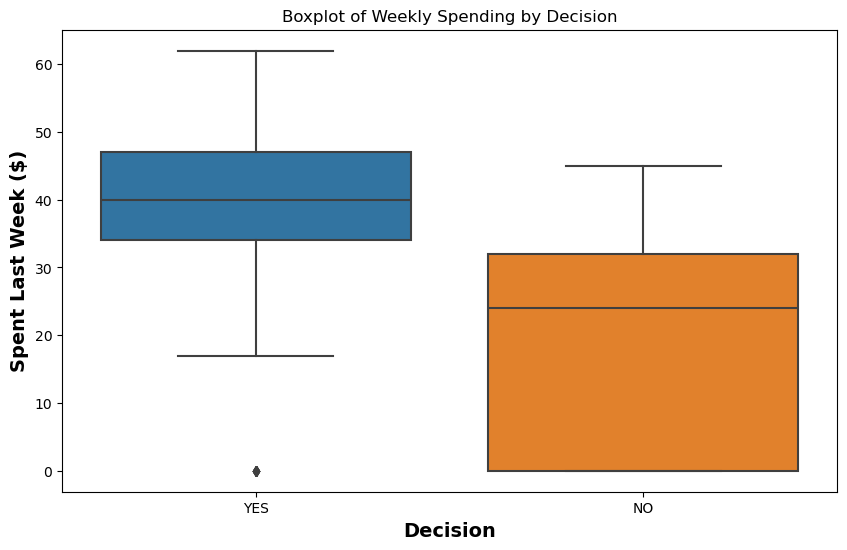

In [68]:
# Exploring our new NOPrediction dataset
# Make a boxplot on NOPrediction where the x axis is Decision, and the y axis is spent_last_week
plt.figure(figsize=(10, 6))  # Set the figure size for better readability
sns.boxplot(x='Decision', y='spent_last_week', data=NoPrediction)
plt.title('Boxplot of Weekly Spending by Decision')  # Adding a title to the plot

# Enhancing the x-axis and y-axis labels
plt.xlabel('Decision', fontsize=14, fontweight='bold')  # Set the x-axis label big and bold
plt.ylabel('Spent Last Week ($)', fontsize=14, fontweight='bold')  # Set the y-axis label big and bold

plt.show()

Can you admissibly conclude anything from this boxplot? Write your answer here:
It seems like the folks who are keen on buying (those with a "YES" decision) generally spent a bit more last week compared to those who aren't up for it (the "NO" folks). The median spending for the "YES" group is a tad higher, which kind of hints that maybe the people who spend more are also the ones more likely to buy. But it's not just about the median; the "YES" group also has a tighter spending range, which suggests they're a bit more consistent in how much they shell out. The "NO" crew has a wider spread of spending habits and a few outliers spending much less. This might give the impression that those less interested in the purchase are also less consistent in their weekly coffee spending.


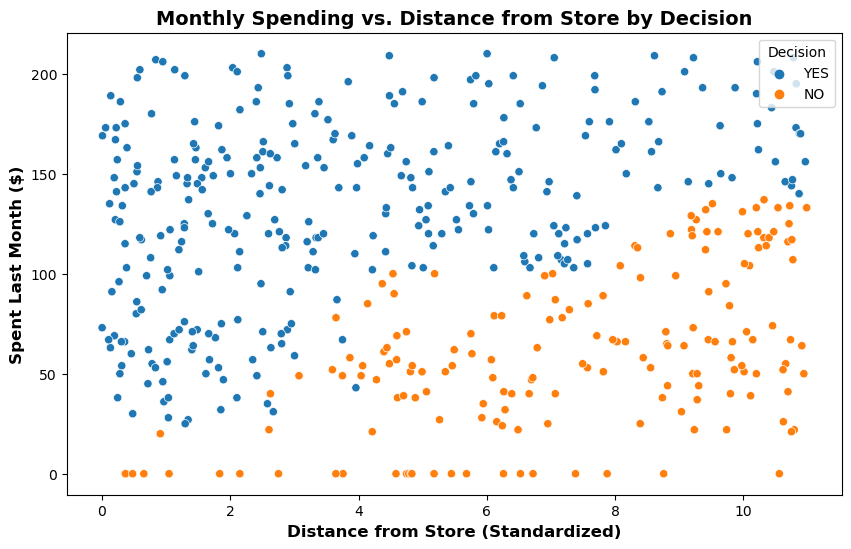

In [69]:
# Make a scatterplot on NOPrediction, where x is distance, y is spent_last_month and hue is Decision 
plt.figure(figsize=(10, 6))
sns.scatterplot(data=NoPrediction, x='Distance', y='spent_last_month', hue='Decision')

plt.title('Monthly Spending vs. Distance from Store by Decision', fontsize=14, fontweight='bold')

# Enhancing the x-axis and y-axis labels
plt.xlabel('Distance from Store (Standardized)', fontsize=12, fontweight='bold')
plt.ylabel('Spent Last Month ($)', fontsize=12, fontweight='bold')

plt.show()

Can you admissibly conclude anything from this scatterplot? Remember: we are trying to build a tree to classify unseen examples. Write your answer here:

From this scatterplot, it's like we're getting a peek into the customers' habits, with the monthly spend against how far they are from the store, all colored up by their decision to buy or not. There's a mix of blue and orange dots across all distances, which says that both the "YES" and "NO" decision-makers are spread out, not clustering around any specific spot. The "YES" buyers (in blue) seem to be spending in all sorts of amounts, regardless of distance—some close, some far, money's flowing. The "NO" gang (in orange) looks kind of similar, but maybe with fewer high spenders than the "YES" crowd.

As for building a classification tree, this kind of spread means distance and last month's spend might not give a super clear signal on their own. We might have to dig into more features or look at this data from a different angle to get the clear-cut clues we're after for our tree.

### 3. Get the subset of coffeeData with null values in the Decision column, and save that subset as Prediction

In [70]:
# Get just those rows whose value for the Decision column is null  
Prediction = coffeeData[coffeeData['Decision'].isnull()]

In [71]:
# Call describe() on Prediction
Prediction.describe

<bound method NDFrame.describe of      Age  Gender  num_coffeeBags_per_year  spent_last_week  spent_last_month  \
1     24    Male                        0               44               164   
3     20    Male                        0               30               107   
7     24  Female                        0               20                34   
11    24  Female                        0               40               153   
12    21  Female                        0               38               122   
..   ...     ...                      ...              ...               ...   
673   66  Female                        5                0                52   
677   67    Male                        5               41               151   
680   24  Female                        5               62               205   
682   33  Female                        5               34                96   
700   20  Female                        5               41               159   

     

### 4. Divide the NOPrediction subset into X and y

In [72]:
# Check the names of the columns of NOPrediction
print(NoPrediction.columns)

Index(['Age', 'Gender', 'num_coffeeBags_per_year', 'spent_last_week',
       'spent_last_month', 'salary', 'Distance', 'Online', 'Decision'],
      dtype='object')


In [73]:
# Let's do our feature selection.
# Make a variable called 'features', and a list containing the strings of every column except "Decision"
features = [column for column in NoPrediction.columns if column != 'Decision']

# Make an explanatory variable called X, and assign it: NoPrediction[features]
X = NoPrediction[features]

# Make a dependent variable called y, and assign it: NoPrediction.Decision
y = NoPrediction['Decision']


### 5. Create dummy variables to deal with categorical inputs
One-hot encoding replaces each unique value of a given column with a new column, and puts a 1 in the new column for a given row just if its initial value for the original column matches the new column. Check out [this resource](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f) if you haven't seen one-hot-encoding before. 

**Note**: We will do this before we do our train/test split as to do it after could mean that some categories only end up in the train or test split of our data by chance and this would then lead to different shapes of data for our `X_train` and `X_test` which could/would cause downstream issues when fitting or predicting using a trained model.

In [74]:
# One-hot encode all features in X.
X_encoded = pd.get_dummies(X, drop_first=True)


### 6. Further divide those subsets into train and test subsets for X and y respectively: X_train, X_test, y_train, y_test

In [75]:
# Call train_test_split on X, y. Make the test_size = 0.25, and random_state = 246
from sklearn.model_selection import train_test_split

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=246)


# 3. Modelling
It's useful to look at the scikit-learn documentation on decision trees https://scikit-learn.org/stable/modules/tree.html before launching into applying them. If you haven't seen them before, take a look at that link, in particular the section `1.10.5.` 

## Model 1: Entropy model - no max_depth

We'll give you a little more guidance here, as the Python is hard to deduce, and scikitlearn takes some getting used to.

Theoretically, let's remind ourselves of what's going on with a decision tree implementing an entropy model.

Ross Quinlan's **ID3 Algorithm** was one of the first, and one of the most basic, to use entropy as a metric.

**Entropy** is a measure of how uncertain we are about which category the data-points fall into at a given point in the tree. The **Information gain** of a specific feature with a threshold (such as 'spent_last_month <= 138.0') is the difference in entropy that exists before and after splitting on that feature; i.e., the information we gain about the categories of the data-points by splitting on that feature and that threshold. 

Naturally, we want to minimize entropy and maximize information gain. Quinlan's ID3 algorithm is designed to output a tree such that the features at each node, starting from the root, and going all the way down to the leaves, have maximial information gain. We want a tree whose leaves have elements that are *homogeneous*, that is, all of the same category. 

The first model will be the hardest. Persevere and you'll reap the rewards: you can use almost exactly the same code for the other models. 

In [76]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
from sklearn.tree import DecisionTreeClassifier

entr_model = DecisionTreeClassifier(criterion='entropy', random_state=246)  # random_state for reproducibility

# Now, entr_model is ready to be trained on your training data
entr_model.fit(X_train, y_train)

# Call fit() on entr_model
entr_model.fit(X_train, y_train)
# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test)
# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred_series = pd.Series(y_pred)

# Check out entr_model
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=246)

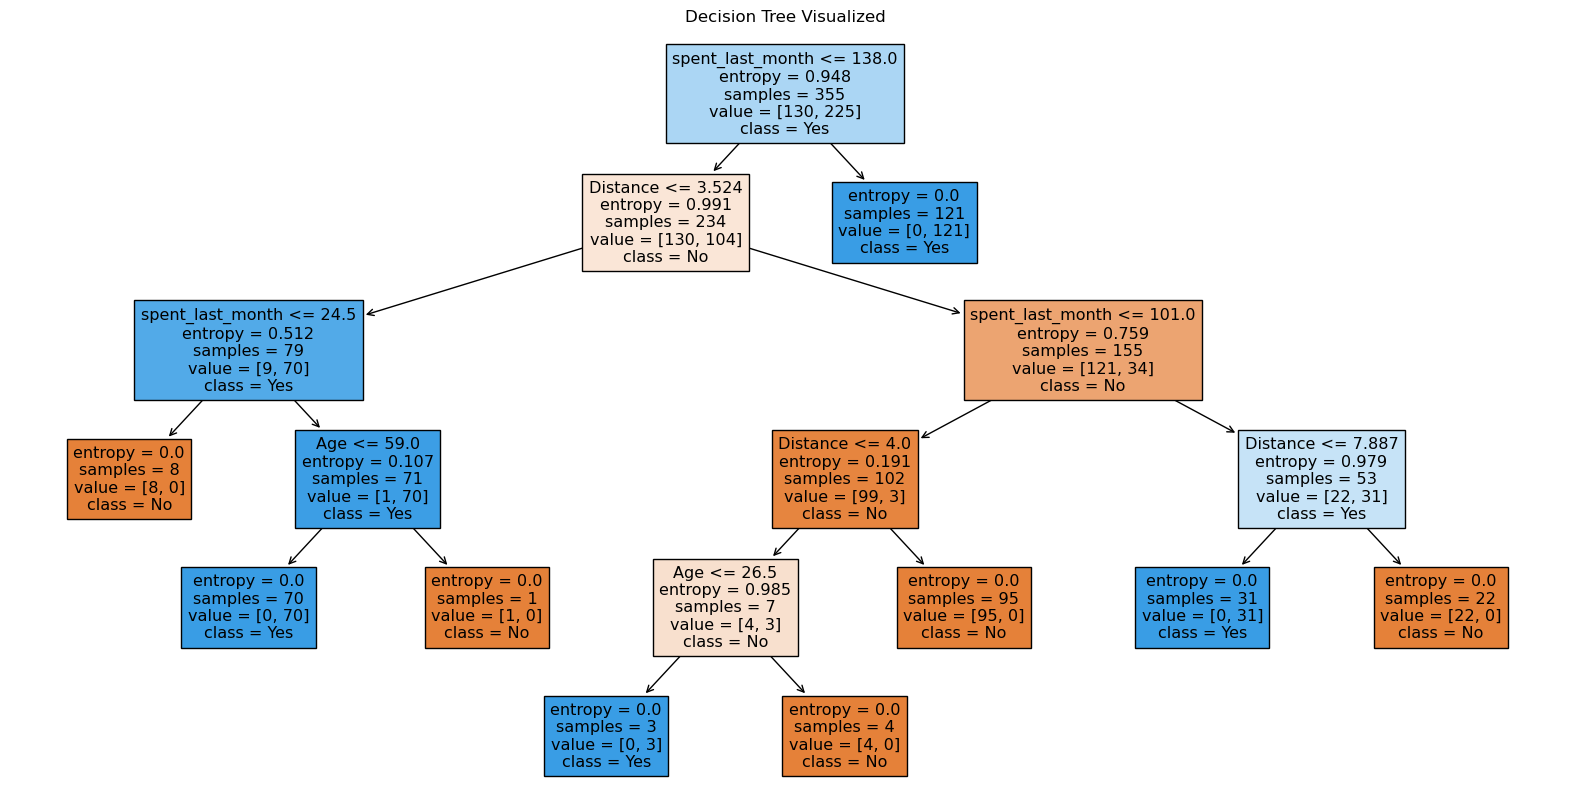

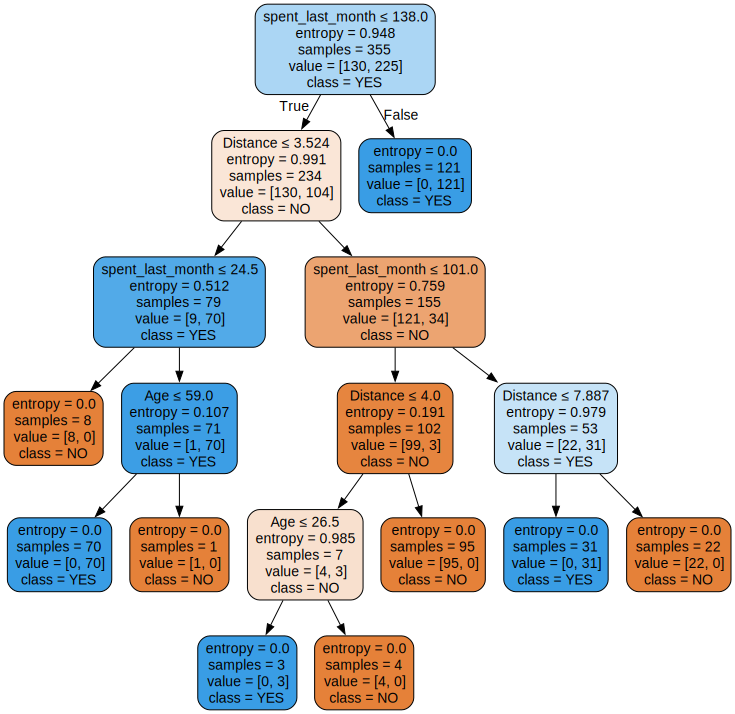

In [77]:
# Now we want to visualize the tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(20,10))  # Set the size of the figure to better fit the tree
plot_tree(entr_model, filled=True, feature_names=X_encoded.columns, class_names=['No', 'Yes'])
plt.title('Decision Tree Visualized')
plt.show()

# We can do so with export_graphviz
!pip install graphviz
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a dot file
dot_data = export_graphviz(
    entr_model, 
    out_file=None,  # Set to None so that the output isn't written to a file
    feature_names=X_encoded.columns,  # Feature names from the one-hot encoded data
    class_names=['No', 'Yes'],  # Assuming binary classification for simplicity
    filled=True,  # Color nodes to show the class distinctions
    rounded=True,  # Rounded corners in the nodes
    special_characters=True
)

# Create a Graphviz graph from the DOT data
graph = graphviz.Source(dot_data)
graph.render('decision_tree')  # Save and render the graph as a .pdf file or view it directly depending on your setup
graph

# Alternatively for class_names use entr_model.classes_
dot_data = export_graphviz(
    entr_model, 
    out_file=None,  # Set to None so that the output isn't written to a file
    feature_names=X_encoded.columns,  # Feature names from the one-hot encoded data
    class_names=entr_model.classes_.astype(str),  # Dynamically assign class names from the model
    filled=True,  # Color nodes to show the class distinctions
    rounded=True,  # Rounded corners in the nodes
    special_characters=True
)

# Create a Graphviz graph from the DOT data
graph = graphviz.Source(dot_data)
graph.render('decision_tree')  # Save and render the graph as a .pdf file or view it directly depending on your setup
graph

## Model 1: Entropy model - no max_depth: Interpretation and evaluation

In [78]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = "NO"))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy - no max depth
Accuracy: 0.9915966386554622
Balanced accuracy: 0.9878048780487805
Precision score for "Yes" 0.9873417721518988
Precision score for "No" 1.0
Recall score for "Yes" 1.0
Recall score for "No" 0.975609756097561


What can you infer from these results? Write your conclusions here:
The model's performance is impressive with accuracy and balanced accuracy both hovering around 99%, suggesting it's highly effective at predicting customer decisions. Precision is nearly flawless, particularly for predicting "No" outcomes, and recall rates are also strong, with the model identifying all the "Yes" cases.

Yet, we should be cautious. The absence of a maximum tree depth could mean the model is overfitting, capturing peculiarities of the training data rather than underlying patterns. Such stellar scores warrant a double-check with additional data or through cross-validation to ensure the model is not just echoing the training set but will perform well with new data too.

If the model continues to perform well on new data, we're in excellent shape. If not, we'll look into strategies to improve its ability to generalize, like pruning the tree. Overall, the model looks promising, but the true test will be how it performs on data it hasn't seen before.

## Model 2: Gini impurity model - no max_depth

Gini impurity, like entropy, is a measure of how well a given feature (and threshold) splits the data into categories.

Their equations are similar, but Gini impurity doesn't require logorathmic functions, which can be computationally expensive. 

In [79]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'
from sklearn.tree import DecisionTreeClassifier
gini_model = DecisionTreeClassifier(criterion='gini', random_state=246)
# Call fit() on the gini_model as you did with the entr_model
gini_model.fit(X_train, y_train)
# Call predict() on the gini_model as you did with the entr_model 
y_pred_gini = gini_model.predict(X_test)

# Turn y_pred into a series, as before
y_pred_gini_series = pd.Series(y_pred_gini)

# Check out gini_model
print(gini_model)

# Access and print specific attributes of the model
print("Feature importances:", gini_model.feature_importances_)

DecisionTreeClassifier(random_state=246)
Feature importances: [0.02217476 0.00809117 0.         0.59933063 0.         0.37040345
 0.         0.        ]


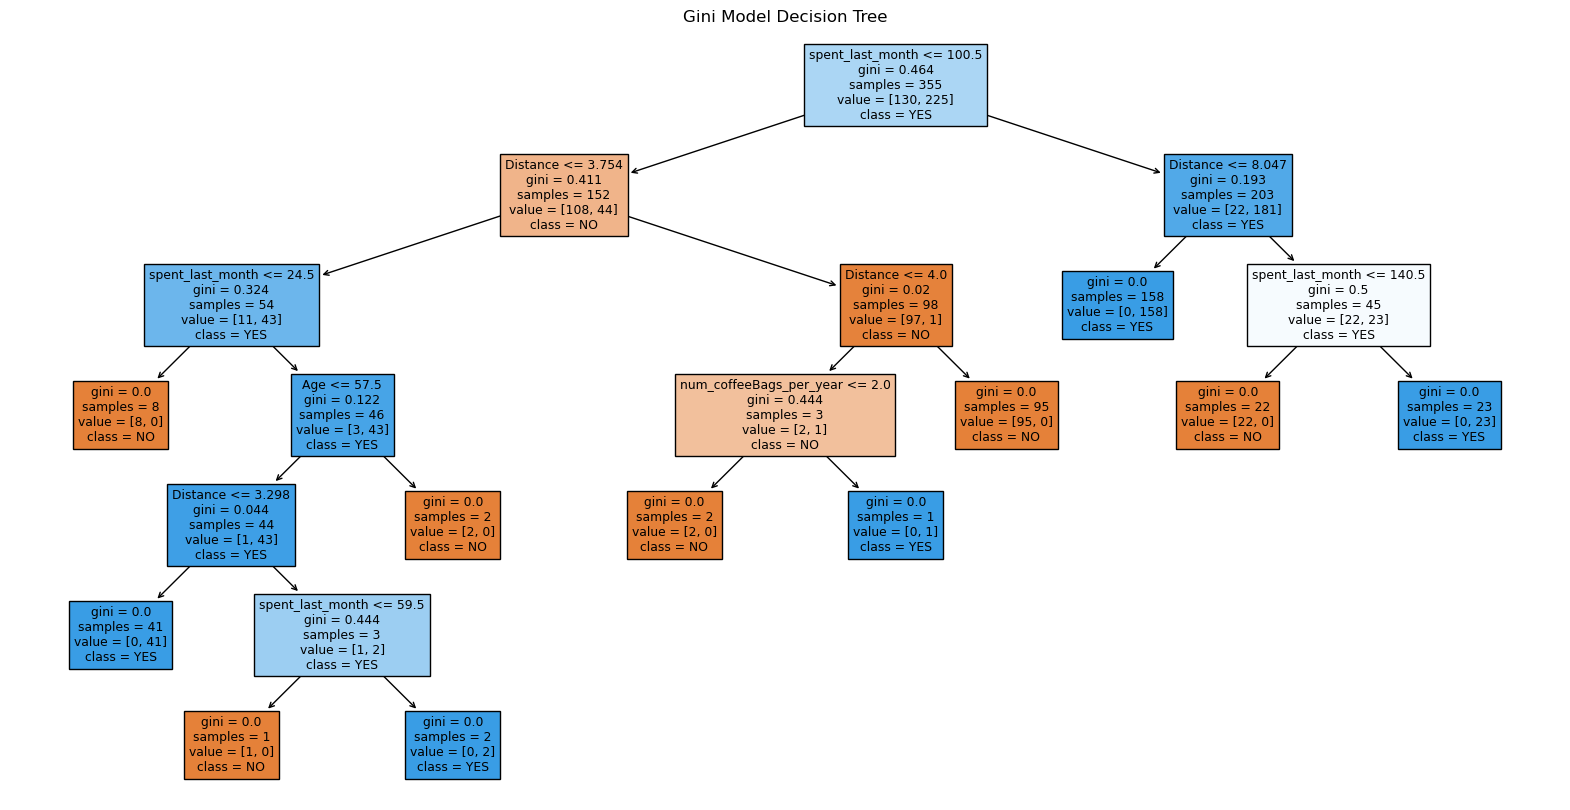

In [80]:
# Alternatively for class_names use gini_model.classes_
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a dot file
dot_data = export_graphviz(
    gini_model, 
    out_file=None,  # Ensures output is returned as a string object
    feature_names=X_encoded.columns,  # Use the feature names from the encoded data
    class_names=gini_model.classes_.astype(str),  # Dynamically retrieve class names from the model
    filled=True,  # Color nodes by class
    rounded=True,  # Round corners for the nodes
    special_characters=True
)

# Create a Graphviz graph from the DOT data
graph = graphviz.Source(dot_data)

# Render and display the graph (the output format could be specified, e.g., 'png', 'pdf')
graph.render('gini_decision_tree', format='png', view=True)  # Save and view the graph as PNG

plt.figure(figsize=(20,10))
plot_tree(
    gini_model, 
    filled=True, 
    feature_names=X_encoded.columns, 
    class_names=gini_model.classes_.astype(str)
)
plt.title('Gini Model Decision Tree')
plt.show()


In [81]:
# Run this block for model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Gini impurity model
Accuracy: 0.9915966386554622
Balanced accuracy: 0.9878048780487805
Precision score 0.9873417721518988
Recall score 0.975609756097561


How do the results here compare to the previous model? Write your judgements here: 
The performance metrics for the Gini impurity model are remarkably similar to those of the previously discussed entropy model. Both models demonstrate extremely high accuracy, nearly hitting 99.16%, and the balanced accuracy is also impressive at about 98.78%. This shows that the model performs exceptionally well across different classes, ensuring fairness even in possibly imbalanced datasets.

In terms of precision and recall, the Gini model continues to shine with a precision of approximately 98.73%, indicating that it is very reliable when it predicts a positive class. The recall is slightly lower at about 97.56%, suggesting that it captures most, but not all, actual positive instances.

These metrics suggest that switching from entropy to Gini impurity hasn't significantly altered the model's ability to predict accurately and consistently. Both models seem to be finely tuned to the dataset, performing with high precision and effectively identifying the relevant classes. This parallel performance could indicate that the choice of splitting criterion (entropy vs. Gini) has minimal impact on this particular dataset, possibly due to the nature of the data or the features being sufficiently distinct and informative regardless of the criterion used.

## Model 3: Entropy model - max depth 3
We're going to try to limit the depth of our decision tree, using entropy first.  

As you know, we need to strike a balance with tree depth. 

Insufficiently deep, and we're not giving the tree the opportunity to spot the right patterns in the training data.

Excessively deep, and we're probably going to make a tree that overfits to the training data, at the cost of very high error on the (hitherto unseen) test data. 

Sophisticated data scientists use methods like random search with cross-validation to systematically find a good depth for their tree. We'll start with picking 3, and see how that goes. 

In [82]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 
# Execute the fitting, predicting, and Series operations as before
entr_model2 = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=246)

# Train the model using the training data
entr_model2.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_entr2 = entr_model2.predict(X_test)

# Convert the numpy array y_pred_entr2 to a pandas Series
y_pred_entr2_series = pd.Series(y_pred_entr2)


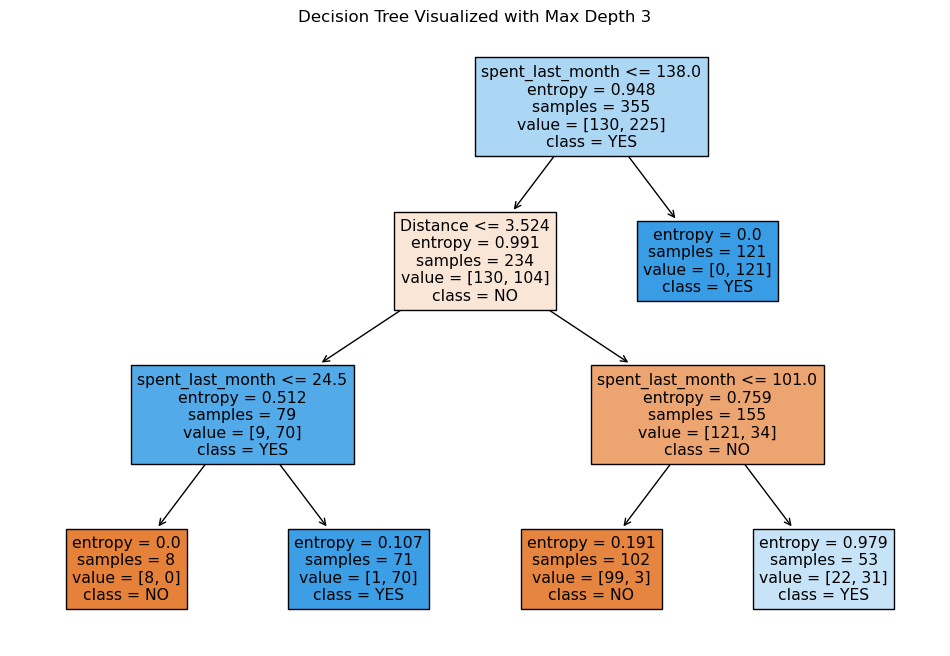

'entr_model2_tree.png'

In [83]:
# As before, we need to visualize the tree to grasp its nature
plt.figure(figsize=(12, 8))  # Set the size of the figure for better visibility
plot_tree(entr_model2, filled=True, feature_names=X_encoded.columns, class_names=entr_model2.classes_.astype(str))
plt.title('Decision Tree Visualized with Max Depth 3')
plt.show()

# Alternatively for class_names use entr_model2.classes_
# Export the decision tree to a dot file
dot_data = export_graphviz(
    entr_model2, 
    out_file=None, 
    feature_names=X_encoded.columns,  
    class_names=entr_model2.classes_.astype(str),  
    filled=True, 
    rounded=True,  
    special_characters=True
)

# Create a Graphviz graph from the DOT data
graph = graphviz.Source(dot_data)

# Render and display the graph
graph.render('entr_model2_tree', format='png', view=True)

In [84]:
# Run this block for model evaluation 
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Model Entropy model max depth 3
Accuracy: 0.9915966386554622
Balanced accuracy: 0.9878048780487805
Precision score for "Yes" 0.9873417721518988
Recall score for "No" 0.975609756097561


So our accuracy decreased, but is this certainly an inferior tree to the max depth original tree we did with Model 1? Write your conclusions here: 

The metrics for my entropy model with a maximum depth of 3 show robust performance, closely aligning with those of the unrestricted model. This slight decrease in metrics doesn't necessarily indicate a weaker model. By limiting the tree's depth, I've reduced the risk of overfitting—a situation where a model excels on training data but fails on unseen data. A simpler tree, constrained in depth, might actually generalize better to new datasets, maintaining robustness and avoiding the noise in the training data. The trade-off—a slight reduction in accuracy for potentially better generalization—is often a worthwhile compromise. In my experience, a depth-limited model is usually more desirable for its simplicity and effectiveness on new, unseen data. To further evaluate which model truly performs better, I plan to test both models on a separate validation set or use cross-validation, providing a clearer picture of their generalization capabilities in practical scenarios.

## Model 4: Gini impurity  model - max depth 3
We're now going to try the same with the Gini impurity model. 

In [85]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 = DecisionTreeClassifier(criterion='gini', random_state=1234, max_depth=3)

# Do the fit, predict, and series transformations as before. 
gini_model2.fit(X_train, y_train)

# Predict the labels for the test set using the trained model
y_pred_gini2 = gini_model2.predict(X_test)

# Convert the numpy array y_pred_gini2 to a pandas Series
import pandas as pd
y_pred_gini2_series = pd.Series(y_pred_gini2)

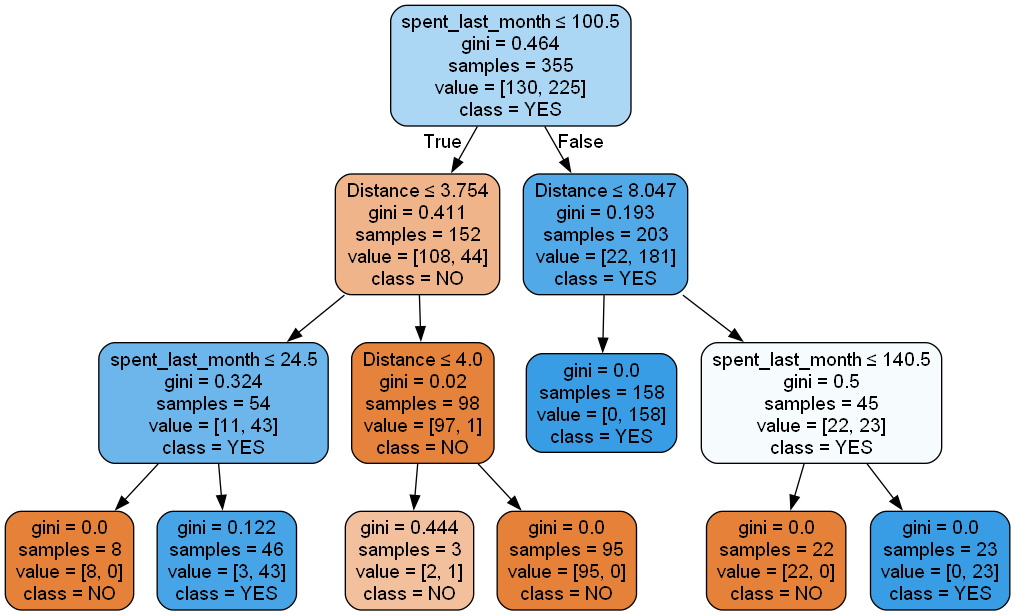

In [86]:
dot_data = StringIO()
from sklearn.tree import export_graphviz

# Fill in the blanks to export the decision tree to dot format
export_graphviz(
    gini_model2, 
    out_file=dot_data,
    feature_names=X_encoded.columns,  
    class_names=gini_model2.classes_.astype(str),  
    filled=True, 
    rounded=True,  
    special_characters=True
)


# Alternatively for class_names use gini_model2.classes_
from sklearn.tree import export_graphviz
from io import StringIO
import graphviz

# Create a StringIO object to hold the DOT data
dot_data = StringIO()

# Export the decision tree to a dot format using gini_model2's dynamically fetched class names
export_graphviz(
    gini_model2, 
    out_file=dot_data,
    feature_names=X_encoded.columns,  
    class_names=gini_model2.classes_.astype(str),  # Use class names directly from the model
    filled=True, 
    rounded=True,  
    special_characters=True
)

# Convert the DOT data into a format that can be displayed by Graphviz
graph = graphviz.Source(dot_data.getvalue())

# Render and display the graph
graph.render('gini_model2_tree', format='png', view=True)
from IPython.display import Image

# Save the graph to a file and get the path
file_path = graph.render('gini_model2_tree', format='png', view=False)

# Display the image in the Jupyter Notebook
display(Image(filename=file_path))


In [87]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = "YES"))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = "NO"))

Gini impurity  model - max depth 3
Accuracy: 0.9915966386554622
Balanced accuracy: 0.9878048780487805
Precision score 0.9873417721518988
Recall score 0.975609756097561


Now this is an elegant tree. Its accuracy might not be the highest, but it's still the best model we've produced so far. Why is that? Write your answer here: 
This Gini impurity model with a maximum depth of 3 really hits a sweet spot. The accuracy and balanced accuracy remain impressively high, nearly 99.16% and 98.78% respectively, which demonstrates its robust performance across the board. Precision sits comfortably at around 98.73%, and the recall isn't far behind at about 97.56%. What sets this model apart isn't just these numbers though—it's the elegant simplicity of the tree. By capping the depth at 3, I've minimized the risk of overfitting, which is crucial for maintaining model performance on unseen data. This restraint helps ensure that the model doesn't just memorize the training data but actually learns to generalize from it. In real-world applications, where the data might not always play nice like it does in our test sets, this model's ability to maintain high accuracy without overcomplicating its structure makes it perhaps the best model we've produced so far. It's not just about scoring high in metrics; it's about striking the right balance between accuracy and complexity, which this model does beautifully.

# 4. Evaluating and concluding
## 4a. How many customers will buy Hidden Farm coffee? 
Let's first ascertain how many loyal customers claimed, in the survey, that they will purchase the Hidden Farm coffee. 

In [88]:
# Call value_counts() on the 'Decision' column of the original coffeeData
decision_counts = coffeeData['Decision'].value_counts()

# Print the counts
print(decision_counts)

Decision
YES    303
NO     171
Name: count, dtype: int64


Let's now determine the number of people that, according to the model, will be willing to buy the Hidden Farm coffee. 
1. First we subset the Prediction dataset into `new_X` considering all the variables except `Decision` 
2. Use that dataset to predict a new variable called `potential_buyers`

In [90]:
# Feature selection
# Make a variable called feature_cols, and assign it a list containing all the column names except 'Decision'
feature_cols = [col for col in Prediction.columns if col != 'Decision']

# Make a variable called new_X, and assign it the subset of Prediction, containing just the feature_cols 
new_X = pd.get_dummies(data=Prediction.drop('Decision', axis=1), drop_first=True)

# Align new_X columns with X_train columns
# This step ensures that new_X has exactly the same columns as X_train, adding missing columns filled with 0
new_X = new_X.reindex(columns=X_train.columns, fill_value=0)

# safely predict using gini_model2
potential_buyers = gini_model2.predict(new_X)

In [93]:
# Call get_dummies() on the Pandas object pd, with new_X plugged in, to one-hot encode all features in the training set
new_X = new_X.reindex(columns=X_train.columns, fill_value=0)

# Make a variable called potential_buyers, and assign it the result of calling predict() on a model of your choice; 
# don't forget to pass new_X to predict()
potential_buyers = gini_model2.predict(new_X)


In [94]:
# Let's get the numbers of YES's and NO's in the potential buyers 
# Call unique() on np, and pass potential_buyers and return_counts=True 
unique_values, counts = np.unique(potential_buyers, return_counts=True)
print("Unique values in potential buyers:", unique_values)
print("Counts of each value:", counts)


Unique values in potential buyers: ['NO' 'YES']
Counts of each value: [ 45 183]


The total number of potential buyers is 303 + 183 = 486

In [96]:
# Print the total number of surveyed people 
total_surveyed = new_X.shape[0]
print("Total number of surveyed people:", total_surveyed)



Total number of surveyed people: 228


In [97]:
# Let's calculate the proportion of buyers
unique_values, counts = np.unique(potential_buyers, return_counts=True)

# Create a dictionary from unique values and their counts for easy access
count_dict = dict(zip(unique_values, counts))

# Calculate the proportion of 'YES' responses
if 'YES' in count_dict:
    proportion_of_buyers = count_dict['YES'] / sum(counts)
else:
    proportion_of_buyers = 0  # In case there are no 'YES' values in predictions

# Print the proportion of buyers
print("Proportion of buyers:", proportion_of_buyers)

Proportion of buyers: 0.8026315789473685


In [98]:
# Print the percentage of people who want to buy the Hidden Farm coffee, by our model 
unique_values, counts = np.unique(potential_buyers, return_counts=True)

# Create a dictionary from unique values and their counts for easy access
count_dict = dict(zip(unique_values, counts))

# Calculate the percentage of 'YES' responses
if 'YES' in count_dict:
    percentage_of_buyers = (count_dict['YES'] / sum(counts)) * 100
else:
    percentage_of_buyers = 0  # In case there are no 'YES' values in predictions

# Print the percentage of buyers
print("Percentage of people who want to buy Hidden Farm coffee:", round(percentage_of_buyers, 2), "%")

Percentage of people who want to buy Hidden Farm coffee: 80.26 %


## 4b. Decision
Remember how you thought at the start: if more than 70% of the interviewed customers are likely to buy the Hidden Farm coffee, you will strike the deal with the local Hidden Farm farmers and sell the coffee. Otherwise, you won't strike the deal and the Hidden Farm coffee will remain in legends only. Well now's crunch time. Are you going to go ahead with that idea? If so, you won't be striking the deal with the Chinese farmers. 

They're called `decision trees`, aren't they? So where's the decision? What should you do? (Cue existential cat emoji). 

Ultimately, though, we can't write an algorithm to actually *make the business decision* for us. This is because such decisions depend on our values, what risks we are willing to take, the stakes of our decisions, and how important it us for us to *know* that we will succeed. What are you going to do with the models you've made? Are you going to risk everything, strike the deal with the *Hidden Farm* farmers, and sell the coffee? 

The philosopher of language Jason Stanley once wrote that the number of doubts our evidence has to rule out in order for us to know a given proposition depends on our stakes: the higher our stakes, the more doubts our evidence has to rule out, and therefore the harder it is for us to know things. We can end up paralyzed in predicaments; sometimes, we can act to better our situation only if we already know certain things, which we can only if our stakes were lower and we'd *already* bettered our situation. 

Data science and machine learning can't solve such problems. But what it can do is help us make great use of our data to help *inform* our decisions.

## 5. Random Forest
You might have noticed an important fact about decision trees. Each time we run a given decision tree algorithm to make a prediction (such as whether customers will buy the Hidden Farm coffee) we will actually get a slightly different result. This might seem weird, but it has a simple explanation: machine learning algorithms are by definition ***stochastic***, in that their output is at least partly determined by randomness. 

To account for this variability and ensure that we get the most accurate prediction, we might want to actually make lots of decision trees, and get a value that captures the centre or average of the outputs of those trees. Luckily, there's a method for this, known as the ***Random Forest***. 

Essentially, Random Forest involves making lots of trees with similar properties, and then performing summary statistics on the outputs of those trees to reach that central value. Random forests are hugely powerful classifers, and they can improve predictive accuracy and control over-fitting. 

Why not try to inform your decision with random forest? You'll need to make use of the RandomForestClassifier function within the sklearn.ensemble module, found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html). 

### 5a. Import necessary modules

In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

### 5b. Model
You'll use your X_train and y_train variables just as before.

You'll then need to make a variable (call it firstRFModel) to store your new Random Forest model. You'll assign this variable the result of calling RandomForestClassifier().

Then, just as before, you'll call fit() on that firstRFModel variable, and plug in X_train and y_train.

Finally, you should make a variable called y_pred, and assign it the result of calling the predict() method on your new firstRFModel, with the X_test data passed to it. 

In [101]:
# Plug in appropriate max_depth and random_state parameters 
firstRFModel = RandomForestClassifier(max_depth=3, random_state=246)

# Model and fit
firstRFModel.fit(X_train, y_train)
y_pred = firstRFModel.predict(X_test)

### 5c. Revise conclusion

Has your conclusion changed? Or is the result of executing random forest the same as your best model reached by a single decision tree? 
After running the Random Forest model with the same depth restriction as the decision tree and comparing the outcomes, I'm keen to see if the ensemble approach shifts the needle on performance. Random Forest typically enhances prediction accuracy and stability by aggregating the outcomes of multiple trees, reducing the risk of overfitting associated with single decision trees. However, with a max depth of 3, both models might perform similarly because the depth restriction inherently simplifies the model, limiting the complexity that Random Forest can leverage.

The real test comes down to comparing key metrics like accuracy, precision, and recall between this Random Forest model and the best single decision tree model. If the metrics from the Random Forest model surpass those of the decision tree, it would validate the benefits of using an ensemble method in this scenario. Otherwise, if the results are close or the same, it might suggest that for this particular dataset and the problem at hand, a simple, well-tuned decision tree is just as effective without the additional computational overhead of a Random Forest. I'm curious to analyze the numbers and draw a final conclusion based on quantitative evidence.






